In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn.functional as F
import numpy as np
from tqdm.auto import tqdm

import fannypack
from lib import dpf, panda_datasets, panda_baseline_models, panda_baseline_training, omnipush_datasets

import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.style.use('seaborn-colorblind')
plt.style.use('seaborn-poster')

In [10]:
def eval_lstm(experiment_name, omnipush=False):

    model = panda_baseline_models.PandaLSTMModel()
    buddy = fannypack.utils.Buddy(
        experiment_name,
        model,
        load_checkpoint=True
    )
    dataset_args = buddy.metadata
    
    if omnipush:
        eval_trajectories = omnipush_datasets.load_trajectories(("simpler/train0.hdf5", 100), **dataset_args)
    else:
        eval_trajectories = panda_datasets.load_trajectories(("data/gentle_push_100.hdf5", 100), **dataset_args)

    with torch.no_grad():
        pred, actual = panda_baseline_training.rollout_lstm(model, eval_trajectories)
        panda_baseline_training.eval_rollout(pred, actual, plot=True)

In [4]:
eval_lstm("lstm_omnipush", omnipush=True)

[buddy-lstm_mujoco_blackout0] Using device: cuda
[buddy-lstm_mujoco_blackout0] Loaded metadata: {'image_blackout_ratio': 0.0, 'sequential_image_rate': 1, 'start_timestep': 0, 'use_haptics': True, 'use_proprioception': True, 'use_vision': True, 'vision_interval': 2}
[buddy-lstm_mujoco_blackout0] Available checkpoint labels: ['0000000000022500', '0000000000023000', '0000000000023500', '0000000000024000', '0000000000024370', 'subsequence_length_16', 'subsequence_length_2']
[buddy-lstm_mujoco_blackout0] Read checkpoint from path: checkpoints/lstm_mujoco_blackout0-0000000000024370.ckpt
[buddy-lstm_mujoco_blackout0] Loaded checkpoint at step: 24370


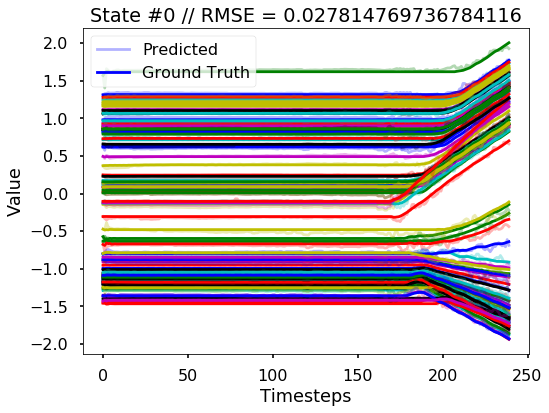

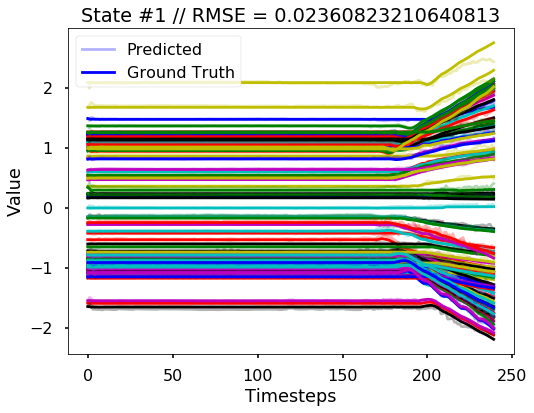

In [5]:
eval_lstm("lstm_mujoco_blackout0", omnipush=False)

[buddy-lstm_mujoco_blackout4] Using device: cuda
[buddy-lstm_mujoco_blackout4] Loaded metadata: {'image_blackout_ratio': 0.4, 'sequential_image_rate': 1, 'start_timestep': 0, 'use_haptics': True, 'use_proprioception': True, 'use_vision': True, 'vision_interval': 2}
[buddy-lstm_mujoco_blackout4] Available checkpoint labels: ['0000000000022500', '0000000000023000', '0000000000023500', '0000000000024000', '0000000000024370', 'subsequence_length_16', 'subsequence_length_2']
[buddy-lstm_mujoco_blackout4] Read checkpoint from path: checkpoints/lstm_mujoco_blackout4-0000000000024370.ckpt
[buddy-lstm_mujoco_blackout4] Loaded checkpoint at step: 24370


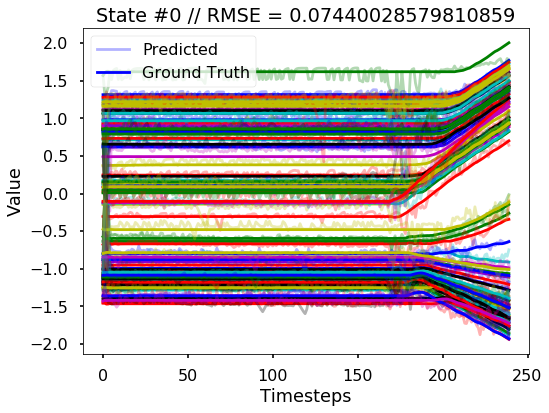

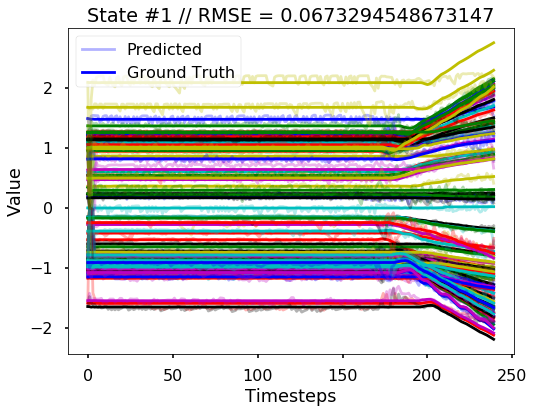

In [6]:
eval_lstm("lstm_mujoco_blackout4", omnipush=False)

[buddy-lstm_mujoco_blackout8] Using device: cuda
[buddy-lstm_mujoco_blackout8] Loaded metadata: {'image_blackout_ratio': 0.8, 'sequential_image_rate': 1, 'start_timestep': 0, 'use_haptics': True, 'use_proprioception': True, 'use_vision': True, 'vision_interval': 2}
[buddy-lstm_mujoco_blackout8] Available checkpoint labels: ['0000000000022500', '0000000000023000', '0000000000023500', '0000000000024000', '0000000000024370', 'subsequence_length_16', 'subsequence_length_2']
[buddy-lstm_mujoco_blackout8] Read checkpoint from path: checkpoints/lstm_mujoco_blackout8-0000000000024370.ckpt
[buddy-lstm_mujoco_blackout8] Loaded checkpoint at step: 24370


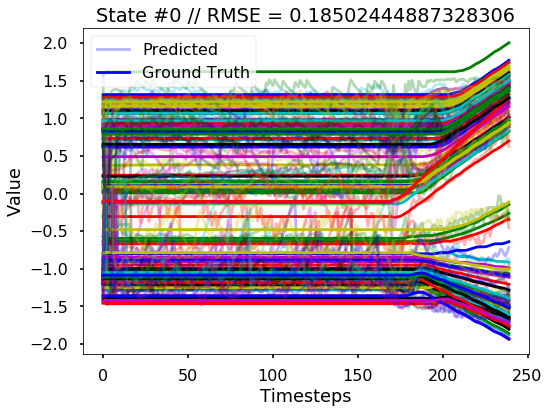

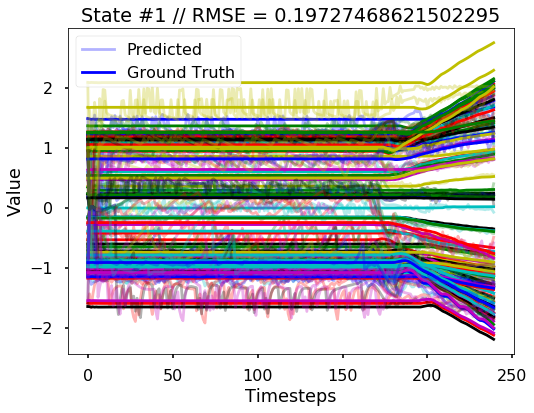

In [7]:
eval_lstm("lstm_mujoco_blackout8", omnipush=False)

[buddy-lstm_mujoco_seq5] Using device: cuda
[buddy-lstm_mujoco_seq5] Loaded metadata: {'image_blackout_ratio': 0.0, 'sequential_image_rate': 5, 'start_timestep': 0, 'use_haptics': True, 'use_proprioception': True, 'use_vision': True, 'vision_interval': 2}
[buddy-lstm_mujoco_seq5] Available checkpoint labels: ['0000000000022500', '0000000000023000', '0000000000023500', '0000000000024000', '0000000000024370', 'subsequence_length_16', 'subsequence_length_2']
[buddy-lstm_mujoco_seq5] Read checkpoint from path: checkpoints/lstm_mujoco_seq5-0000000000024370.ckpt
[buddy-lstm_mujoco_seq5] Loaded checkpoint at step: 24370
0.028261888696534773


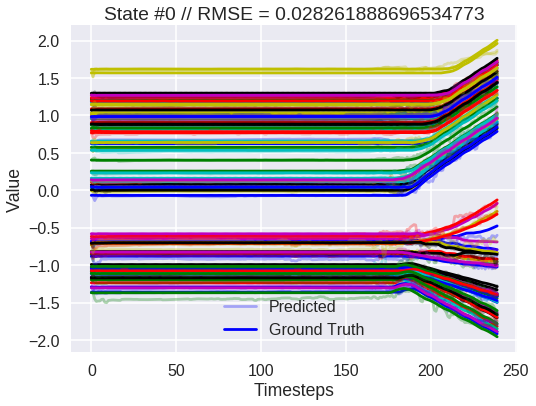

0.024629839697372372


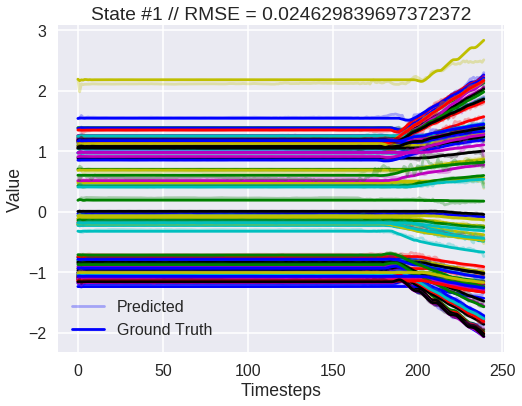

In [11]:
eval_lstm("lstm_mujoco_seq5", omnipush=False)